# Random Forests in Python

This is a quick Random Forest Classifer (RFC) project to demonstrate how to use a RFC.<br>
The data is related to spinal disorder known as Kyphosis.<br>
We will attempt to use this data to predict the prescence of Kyphosis.

**Note: If a categorical variable column exist, dummy variables need to be created.  A dummy variable is a Nominal variable that can take on either 0 or 1. In your regression model, if you have k categories you would include only k-1 dummy variables in your regression/classifier because any one dummy variable is perfectly multicollinear/collinear with remaining set of dummies.**

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Get the Data

In [2]:
df = pd.read_csv('kyphosis.csv')
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


### Determine if the data is skewed in one direction or another by assessing if the classification is evenly split between the possible outcome labels.  If the outcome labels are not balanced (50/50) split, then that will impact the model

In [17]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

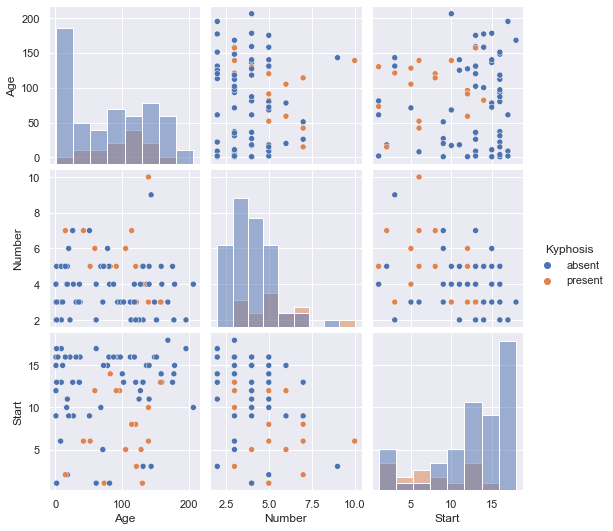

In [4]:
sns.pairplot(df, hue='Kyphosis', diag_kind='hist')

## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rfc = RandomForestClassifier(n_estimators=200)

### Fit the RFC

In [11]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

## Prediction and Evaluation 

In [12]:
y_pred = rfc.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [14]:
print(confusion_matrix(y_test, y_pred))
print('')
print(classification_report(y_test,y_pred))

[[19  0]
 [ 5  1]]

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [15]:
cm = confusion_matrix(y_test, y_pred)

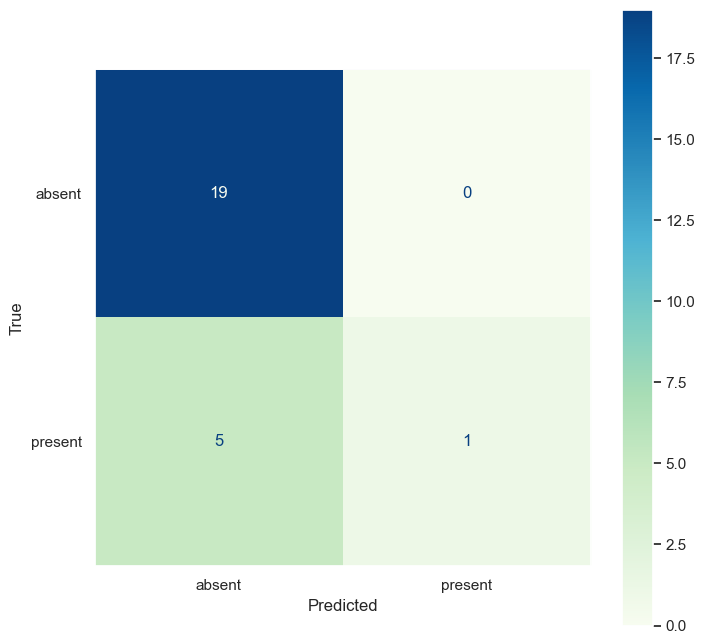

In [16]:
cmd = ConfusionMatrixDisplay(cm, display_labels=['absent','present'])
fig, ax = plt.subplots(figsize=(8,8))
cmd.plot(include_values=True, cmap='GnBu', ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='True', autoscale_on=True)
plt.grid(visible=None)

# Conclusion

As mentioned at the beginning of the EDA, it was noted that there was an imbalance between Kyphosis outcomes which impacted the accuracy of the RFC.  In future modeling, balancing those outcomes to where they are 50/50 should improve the accuracy of the RFC model.